In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Para manter consistência dos resultados

In [3]:
np.random.seed(777)

In [4]:
from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Sequential

Using TensorFlow backend.


### Imagem original do gato

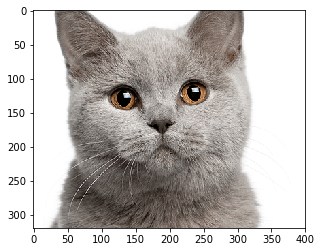

In [5]:
cat = mpimg.imread('cat.png')
plt.imshow(cat)

### Nota-se que a imagem acima tem 320 pixels no sentido vertical, da altura, 400 pixels no sentido horizontal, da largura e 4 canais, sendo os canais correspondentes aos tons de RGB e um quarto canal para o alpha da imagem

In [6]:
print(cat.shape)

(320, 400, 4)


## O código abaixo cria um novo modelo da rede, adicionando uma camada convolucional que treina 3 características das amostras de entrada, usando filtros de dimensão 3x3 e passo igual a 1.

## Isto significa que a camada irá:
### 1. Criar 3 mapas de características da imagem do gato
### 2. Irá varrer a imagem do gato percorrendo cortes de tamanho 3 pixels de altura por 3 pixels de largura
### 3. Irá se deslocar no sentido horizontal movendo de pixel em pixel, e assim que chegar ao final da linha, irá se deslocar somente uma posição também, tendo como novo topo a linha seguinte à do topo anterior.
### 4. Cada filtro irá fazer uma convolução entre os seus valores e os valores do corte percorrido, multiplicando os valores correspondentes de cada posição das duas matrizes e somando o valores obtidos. O somatório correspondente é armazenado no mapa de características associado ao filtro da convolução.
### 5. A convolução é realizada uma vez para cada canal da imagem, de forma que ao final da convolução de cada canal os valores do mapa de características daquele filtro vão sendo acumulados, resultando em 3 mapas finais, um para cada filtro.

In [7]:
model = Sequential()
model.add(Convolution2D(3, (3,3), input_shape=cat.shape))

## O código abaixo ajusta a dimensão do vetor de entrada, correspondente à imagem do gato. O valor 1 indica a quantidade de amostras, no caso somente 1, por ser só uma imagem do gato.

In [8]:
cat_batch = np.expand_dims(cat,axis=0)
print(cat_batch.shape)

(1, 320, 400, 4)


## O código abaixo faz uma tentativa de reconstrução da imagem do gato a partir do modelo criado anteriormente

In [9]:
conv_cat = model.predict(cat_batch)

## O método abaixo agrupa as últimas linhas acima, ajustando a dimensão da imagem do gato para contemplar o tamanho das amostras, fazer uma predição em cima deste novo vetor redimensionado e depois retornar a única amostra para a dimensão original para exibi-la e ver como o que o modelo estimou.

In [10]:
def visualize_cat(model, cat):
    print("Dimensão original do gato", cat.shape)
    cat_batch = np.expand_dims(cat,axis=0)
    print("Dimensão expandida para contemplar quantidade de amostras", cat_batch.shape)
    conv_cat = model.predict(cat_batch)
    print("Dimensão da predição do modelo", conv_cat.shape)
    conv_cat = np.squeeze(conv_cat, axis=0)
    print("Dimensão removendo a quantidade de amostras", conv_cat.shape)
    plt.imshow(conv_cat)

## A linha abaixa invoca o método criado anteriormente, para analisar como o modelo estima a imagem do gato. Note que houve uma perda das informações originais, correspondente ao tamanho dos mapas de características, que reduziram a dimensão da imagem em duas unidades em cada sentido, bem como a perda de um canal de dados, por ter usado somente um mapa a menos de características em relação ao número de canais.

### A dimensão da saída pode ser calculada utilizando a dimensão da entrada, a dimensão dos filtros e o tamanho do passo, pela fórmula (dimensão_entrada - dimensão_filtro)/tamanho_passo + 1:

### Para a altura:  320 - 3 / 1 + 1 = 318
### Para a largura: 400 - 3 / 1 + 1 = 398

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 318, 398, 3)
Dimensão removendo a quantidade de amostras (318, 398, 3)


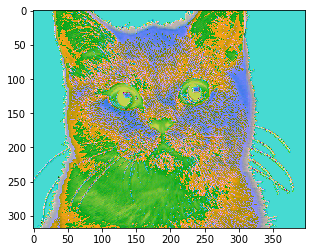

In [11]:
visualize_cat(model, cat)

## O código abaixo cria um novo modelo de convolução, mas desta vez usando filtros de dimensões 10x10, ou seja, varrendo um corte maior da imagem e extraindo menos características

In [12]:
model = Sequential()
model.add(Convolution2D(3, (10,10), input_shape=cat.shape))

## Note que a visualização do gato com este novo modelo promove uma perda maior ainda de informações, por usar um filtro de tamanho maior, mantendo a mesma quantidade do filtro. Desta vez, a imagem resultante fica mais distante ainda em relação à original.

## Com este novo modelo, usando a fórmula acima, a dimensão da entrada cai de 400 x 320 para 391 x 311, diferente do modelo anterior, que gerava 398x318.

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 311, 391, 3)
Dimensão removendo a quantidade de amostras (311, 391, 3)


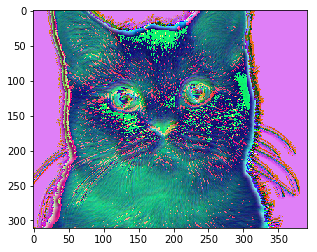

In [13]:
visualize_cat(model, cat)

## O código abaixo cria uma versão do mesmo método criado anteriormente, mas que faz um processamento adicional, removendo a dimensão da imagem correspondente aos canais, usando somente um canal para a exibição da imagem estimada pelo modelo.

In [14]:
def imprime_gatinho_fofo(model, cat):
    print("Dimensão original do gato", cat.shape)
    cat_batch = np.expand_dims(cat,axis=0)
    print("Dimensão expandida para contemplar quantidade de amostras", cat_batch.shape)
    conv_cat2 = model.predict(cat_batch)
    print("Dimensão da predição do modelo", conv_cat2.shape)
    conv_cat2 = np.squeeze(conv_cat2, axis=0)
    print("Dimensão removendo a quantidade de amostras", conv_cat2.shape)
    conv_cat2 = conv_cat2.reshape(conv_cat2.shape[:2])
    print("Dimensão removendo a quantidade de canais", conv_cat2.shape)
    plt.imshow(conv_cat2)

## O código abaixo cria um novo modelo, mas com somente um mapa de características, voltando a usar um nível de detalhe com filtros 3x3.

In [15]:
model = Sequential()
model.add(Convolution2D(1, (3,3), input_shape=cat.shape))

## Conforme pode-se ver pela imagem gerada, ela foi estimada com somente um canal e somente um mapa de características, mantendo neste mapa os valores correspondentes ao canal de uma única cor, verde (dentre os canais de vermelho, verde ou azul)

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 318, 398, 1)
Dimensão removendo a quantidade de amostras (318, 398, 1)
Dimensão removendo a quantidade de canais (318, 398)


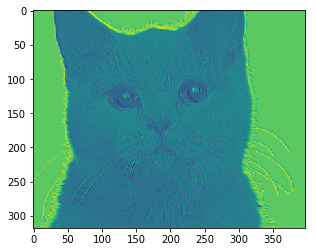

In [16]:
imprime_gatinho_fofo(model, cat)

## O código abaixo cria um novo modelo, voltando a usar um único mapa de características, com dimensões reduzidas, a partir do uso de filtros maiores, 15x15.

In [17]:
model = Sequential()
model.add(Convolution2D(1, (15,15), input_shape=cat.shape))

## Desta vez a imagem gerada do gato a partir do modelo tem bem menos detalhes, devido ao aumento da dimensão dos filtros, e de uma maior perda de informações no mapa de características resultantes: de 400x320 para 386x306, em um único canal verde.

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 306, 386, 1)
Dimensão removendo a quantidade de amostras (306, 386, 1)
Dimensão removendo a quantidade de canais (306, 386)


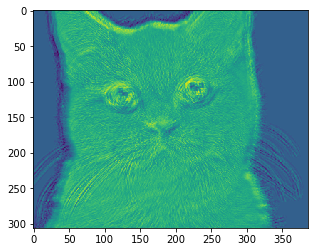

In [18]:
imprime_gatinho_fofo(model, cat)

## O código abaixo cria um modelo semelhante aos criados anteriormente, com um único mapa, e filtros 3x3, mas, desta vez, adicionando uma camada ReLU, para dar uma maior ênfase às características extraídas da imagem do gato.

In [19]:
model = Sequential()
model.add(Convolution2D(1, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))

## Note que na impressão da imagem do gato, usando o modelo com ReLU, a imagem ficou mais nítida, pois foram desprezadas as informações que não condizeram com as características extraídas pelo modelo.

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 318, 398, 1)
Dimensão removendo a quantidade de amostras (318, 398, 1)
Dimensão removendo a quantidade de canais (318, 398)


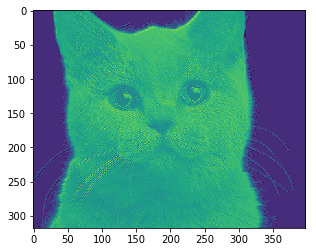

In [20]:
imprime_gatinho_fofo(model, cat)

In [21]:
model = Sequential()
model.add(Convolution2D(3, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 318, 398, 3)
Dimensão removendo a quantidade de amostras (318, 398, 3)


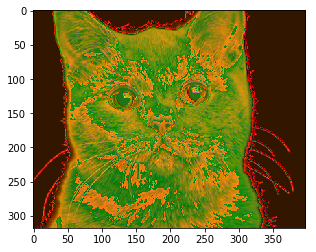

In [22]:
visualize_cat(model, cat)

In [23]:
model = Sequential()
model.add(Convolution2D(1, (3,3), input_shape=cat.shape))
model.add(MaxPooling2D(pool_size=(5,5)))

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 63, 79, 1)
Dimensão removendo a quantidade de amostras (63, 79, 1)
Dimensão removendo a quantidade de canais (63, 79)


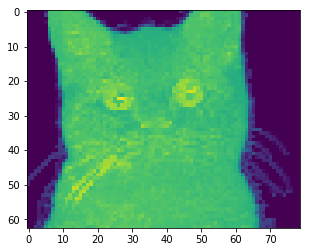

In [24]:
imprime_gatinho_fofo(model, cat)

In [25]:
model = Sequential()
model.add(Convolution2D(3, (3,3), input_shape=cat.shape))
model.add(MaxPooling2D(pool_size=(5,5)))

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 63, 79, 3)
Dimensão removendo a quantidade de amostras (63, 79, 3)


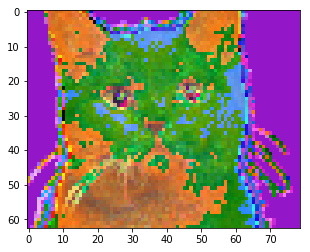

In [26]:
visualize_cat(model, cat)

In [27]:
model = Sequential()
model.add(Convolution2D(1, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 63, 79, 1)
Dimensão removendo a quantidade de amostras (63, 79, 1)
Dimensão removendo a quantidade de canais (63, 79)


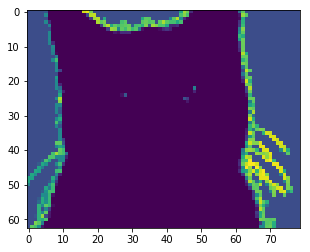

In [28]:
imprime_gatinho_fofo(model, cat)

In [29]:
model = Sequential()
model.add(Convolution2D(3, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 63, 79, 3)
Dimensão removendo a quantidade de amostras (63, 79, 3)


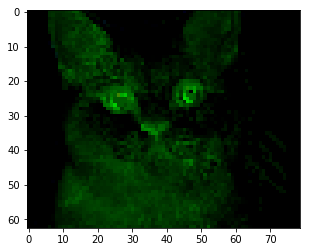

In [30]:
visualize_cat(model, cat)

In [31]:
model = Sequential()
model.add(Convolution2D(1, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(1, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 34, 43, 1)
Dimensão removendo a quantidade de amostras (34, 43, 1)
Dimensão removendo a quantidade de canais (34, 43)


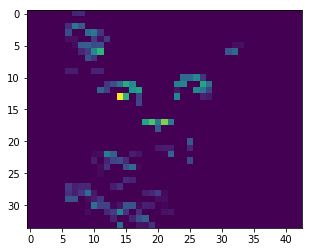

In [32]:
imprime_gatinho_fofo(model, cat)

In [33]:
model = Sequential()
model.add(Convolution2D(3, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(1, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 52, 65, 1)
Dimensão removendo a quantidade de amostras (52, 65, 1)
Dimensão removendo a quantidade de canais (52, 65)


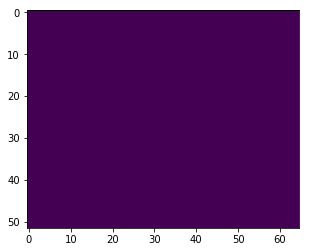

In [34]:
imprime_gatinho_fofo(model, cat)

In [35]:
model = Sequential()
model.add(Convolution2D(3, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(3, (3,3), input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

Dimensão original do gato (320, 400, 4)
Dimensão expandida para contemplar quantidade de amostras (1, 320, 400, 4)
Dimensão da predição do modelo (1, 52, 65, 3)
Dimensão removendo a quantidade de amostras (52, 65, 3)


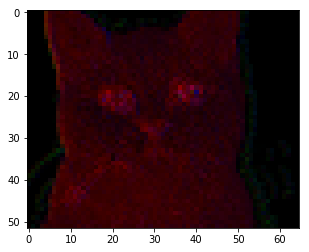

In [36]:
visualize_cat(model, cat)